# Final Project Template
**Notebook Preparation for Lesson**

Once you open the notebook:

1. Save in on your google drive (copy to drive) and name it DMAP FA21 Final Project
2. Share the notebook and copy the share ID to the NOTEBOOK_ID (and re-save the notebook)
3. This ID should remain the same for all your milestones
4. You will submit a copy of your updated notebook (this file) on Moodle for each milestone


In [9]:
# Keep this code cell here
# Project title will be used by the reviewer
PROJECT_TITLE = "Predicting Conspiracy Beliefs"
NOTEBOOK_ID   = "19ZaG8MrPvBccE1PrLZ73gupKDtN4Lved"
VERSION = "FA21"


---
# Project Introduction

Double click on this cell to see its contents.  We expect you to replace this cell.

<img align="left" src="http://drive.google.com/uc?export=view&id=1nA9491MchEtFcklvtIGqOnipE63C2FGD"/>

• Describe the **context**, sitution, problem to be solved/explored

• Whatever you need to get the reader _involved_

• Images can be hosted using google drive (you may need to create a transparent border)

• Even formulas when needed: 
$$e^x = \sum_{k=0}^{\infty} \frac{x^k}{k!}$$

• Note that markdown is very whitespace sensitive.
• Click on this cell to read comments.

<!-- this is a comment -->
<!-- 

   VIDEO INSTRUCTIONS (and data hosting)

1. upload to google drive, get the share URL
https://drive.google.com/file/d/1yGvY5a0KAqnOKf5kLh5EbbbRY4_LonAX

2. convert to export URL:
http://drive.google.com/uc?export=download&id=1yGvY5a0KAqnOKf5kLh5EbbbRY4_LonAX

3. OR use some other service to host your video:
https://storage.googleapis.com/uicourse/videos/dmap/Exact%20Instructions%20Challenge%20-%20THIS%20is%20why%20my%20kids%20hate%20me.%20%20Josh%20Darnit.mp4

replace the src="YOUR VIDEO URL" in the <source> tag in the next cell below
-->

In [10]:
%%html
<!-- this should be the ONLY html cell in the notebook: use markdown -->
<div style="font-size:36px; max-width:800px; font-family:Times, serif;">
 Predicting Conspiracy Beliefs
<video width="600" controls>
  <source src="https://vimeo.com/654321187"
  type="video/mp4">
</video>
</div>
Note: If your video is too large, you can host it on Vimeo, YouTube, etc and paste the URL here
URL = "https://vimeo.com/654321187"

In [11]:
# add your imports here for your entire project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import tree
from sklearn import model_selection

#Project Introduction
A detailed description about the problem/ research question(s) you are addressing, goals/expected outcome of the project, a brief introduction to your data, and the techniques you will be using.

More than any period in history, we are dependent on the internet to live our everyday life and get our work done. We are surrounded by myriad information every day and it becomes increasingly hard to evaluate the quality and truthfulness of each piece of information as we digest them. Since how we see the world and others is heavily influenced by the information we received, it is likely for some people to form certain beliefs that are not supported by sufficient evidence. Conspiracist ideation – belief in conspiracy theories – is a typical example of such beliefs. People endorsing conspiracy theories tend to explain an event or situation by invoking a conspiracy by sinister and powerful groups, often political in motivation, when other explanations are more probable (Brotherton et al., 2013). A number of studies investigating conspiracy beliefs find that conspiracy beliefs do not result from rational evaluation of the evidence related to each specific conspiracist claim; rather there seems to be stable individual differences in the general tendency to engage with conspiracist explanations for events (e.g., Goertzel, 1994; Swami et al., 2010, 2011, 2013; Wood et al., 2012). Findings suggest that there are relationships between conspiracy beliefs and personality traits and cognitive styles, but they are limited in robustness and strength (see Swami et al., 2010, 2011, 2013; Swami and Furnham, 2012). If conspiracy beliefs and personality traits and/or cognitive styles are indeed related, it is plausible to predict one from the other. For this project, I would like to use machine learning approaches to try making prediction on conspiracy beliefs from personality traits. I will investigate the effects of personality traits and demographic information (e.g., age, gender, education, major), separately, on predicting conspiracy beliefs. The dataset I will use was collected by [Open Psychometrics](https://openpsychometrics.org/), through an interactive online version of the **Generic Conspiracist Belief Scale (GCBS)** (Brotherton et al., 2013) in 2016. It contains 2495 responses (rows) and 72 columns, comprised of 15 items from GCBS, time spent in answering the questions, 10 items from a brief measure of the Big Five Personality Domains (Gosling et al., 2003), 16 items for validity check, and a bunch of questions related to demographic information.  I intend to utilize both parametric (e.g., multiple linear regression) and nonparametric (e.g., decision trees) models, and compare their prediction performance. 

# Data Acquisition, Selection, Cleaning
Introduce the data here as well as any technical overview that's important that wasn't given in the introduction


The GCBS contains 15 items. Each item is a statement of a conspiracy belief. The scale was constructed using 3 items representing each of the 5 important facets of conspiracist ideation. The responses to these questions are on a 5-point Likert scale (which is an ordinal scale), with a higher rating of an item corresponding to a stronger belief in it. Since all the questions use the same Likert scale, it is common practice to sum the individual item scores and treat the sum (or mean) as on an interval scale (Norman 2010; Perla & Carifio 2007). Therefore, I will use the mean score of the 15 items (ranging from 1 to 5, treated as interval data) as the dependent variable to reflect the degree of beliefs in conspiracy theories overall.

To investigate the effect of personality traits on predicting conspiracy beliefs, I will select the 10 response variables associated with the Ten Item Personality Inventory as my independent variables. They are on a 7-point Likert scale (ordinal). On the other hand, I will use the variables related to the respondent’s demographic information (e.g., years of education and major, gender, age, religion, race, etc.) as predictors to study their effects on predicting conspiracist ideation. Most of the variables are on a nominal scale and have been coded in numbers already. The only variable that needs a substantial amount of cleaning is “major”, whose data are strings and not uniformly formatted. After first investigation of the data (see in code), there are no missing values in any of the variables except for the variable ‘major’. Since nearly half of the ‘major’ values are not available, imputing them is not plausible or practical, and getting rid of the instances leads to a huge waste of potentially informative data, I decide to remove the variable from the selected set of predictors. 

For a complete view and explanation of the variables, please see the accompanied 'codebook' in the Google Drive shared folder ([codebook](https://drive.google.com/file/d/1JcjELv8S66EW-aeioVanLt-jq13hzh0R/view?usp=sharing)). 

To achieve interpretability of the models, I plan to fit a linear regression model, as the parametric model, and a decision tree model, as the nonparametric one, to my data. I will utilize 5-fold cross validation in model training.


In [12]:
# read data from google drive
url = 'https://drive.google.com/file/d/14ppYjXV4N9FNbcmSSLLc1AXq6Tffi7hP/view?usp=sharing'
doc_id = '14ppYjXV4N9FNbcmSSLLc1AXq6Tffi7hP'
base_url = 'https://drive.google.com/uc?id=' + doc_id
df = pd.read_csv(base_url)
df.head()


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13,E14,E15,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,hand,religion,orientation,race,voted,married,familysize,major
0,5,5,3,5,5,5,5,3,4,5,5,5,3,5,5,7070,7469,7383,6540,9098,4998,6971,4713,6032,5878,4031,4386,9077,5113,4204,11,95,142,5,3,6,2,6,6,7,2,7,1,1,1,1,1,1,0,0,0,0,1,1,0,1,1,1,1,3,0,1,2,28,1,2,1,5,2,1,1,ACTING
1,5,5,5,5,5,3,5,5,1,4,4,5,4,4,5,4086,13107,2807,5030,7405,7864,16234,2603,14174,9423,11683,12718,4816,6806,4823,6,125,144,6,7,6,7,6,3,7,5,1,1,1,1,0,1,1,0,0,0,0,1,1,0,0,1,1,1,1,2,2,1,14,1,1,2,4,2,1,1,NaN
2,2,4,1,2,2,2,4,2,2,4,2,4,0,2,4,27535,7814,7762,10290,8558,10538,4740,4162,6492,11512,6874,11440,0,11418,9872,7,141,90,6,6,6,1,7,5,6,5,7,7,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,4,2,2,2,26,1,1,1,4,1,1,2,philosophy
3,5,4,1,2,4,5,4,1,4,5,5,5,1,4,5,4561,5589,3506,3784,5093,3555,3158,1887,7678,2304,3604,2724,2689,2657,3824,5,58,135,6,7,7,5,7,6,5,1,5,1,1,1,1,1,1,0,0,1,0,1,1,0,1,1,0,1,3,1,1,1,25,1,12,1,4,1,1,3,history
4,5,4,1,4,4,5,4,3,1,5,5,5,3,5,5,8841,7575,3832,7775,4160,5216,7559,5792,10296,5455,3864,11799,7872,10543,4224,4,105,210,1,3,7,2,6,4,5,5,5,3,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1,2,2,1,1,37,1,2,2,4,2,2,2,Psychology


In [13]:
print(df.isna().sum())

Q1               0
Q2               0
Q3               0
Q4               0
Q5               0
              ... 
race             0
voted            0
married          0
familysize       0
major         1158
Length: 72, dtype: int64


In [14]:
df.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13,E14,E15,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,hand,religion,orientation,race,voted,married,familysize
count,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2.495000e+03,2.495000e+03,2495.000000,2.495000e+03,2495.000000,2495.000000,2.495000e+03,2495.000000,2495.000000,2495.000000,2495.000000,2.495000e+03,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000
mean,3.472545,2.963527,2.046894,2.636072,3.254108,3.108617,2.666934,2.450501,2.232866,3.502204,3.265331,2.644890,2.103006,2.955912,4.227655,4.441990e+04,5.150646e+04,6663.946693,2.286794e+04,7548.478557,8060.431663,8.209945e+03,4762.673747,6599.963126,9222.479760,8850.744289,1.117300e+04,6547.332665,7660.725451,7665.187976,850.004008,288.237675,298.517034,3.483367,4.373547,4.777555,4.333467,5.630060,5.024048,4.967936,4.030461,4.364329,2.537475,0.972345,0.941884,0.549098,0.975551,0.952705,0.104609,0.272545,0.453307,0.059319,0.967134,0.313427,0.167134,0.788377,0.926253,0.970741,0.982766,2.323046,2.119439,1.557515,1.242084,43.365531,1.182365,4.180361,1.662525,3.844489,1.662926,1.262124,2.560321
std,1.455552,1.494669,1.387236,1.451371,1.471855,1.506676,1.509954,1.569256,1.419266,1.388713,1.400302,1.504787,1.382461,1.489222,1.104538,1.354595e+06,1.614006e+06,10890.202483,6.562459e+05,9892.172182,9338.071912,3.665693e+04,7820.863912,11945.745740,18519.041061,15473.033589,1.001520e+05,6090.033961,7594.379339,23886.001809,8176.969673,3452.492990,2964.644784,1.986629,1.863189,1.763883,2.043292,1.414999,1.834639,1.756810,1.919562,1.933313,1.645660,0.164016,0.234010,0.497683,0.154469,0.212311,0.306111,0.445358,0.497915,0.236267,0.178321,0.463979,0.373170,0.408541,0.261412,0.168564,0.130170,0.947208,0.762074,0.596534,0.435854,684.593489,0.496186,3.697397,1.170653,0.924942,0.491924,0.559446,2.355926
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,415.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,3.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,4.000000,5.912500e+03,5.779500e+03,3524.000000,4.087500e+03,4167.500000,4497.500000,4.233000e+03,2580.500000,3473.500000,4794.000000,4695.500000,4.835500e+03,3789.000000,4439.500000,3782.500000,3.000000,81.000000,105.000000,2.000000,3.000000,3.000000,2.000000,5.000000,4.000000,4.000000,2.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000

Note that there are some "0" values in columns where a zero-value is not allowed/possible, such as Q1-Q15, TIPI1-TIPI10, and all of the demographic information variables. They are regarded as missing values. Let's see how many missing values each relevant column has. First, drop the irrelevant columns for easier manipulation of the data.

In [15]:
df_reduced = df.drop(columns=['E1', 'E2',  'E3',	'E4',	'E5',	'E6',	'E7',	'E8',	'E9',	'E10',	'E11',	'E12',	'E13',	'E14',	'E15', 'introelapse',	'testelapse',	'surveyelapse',
        'VCL1',	'VCL2',	'VCL3',	'VCL4',	'VCL5',	'VCL6',	'VCL7',	'VCL8',	'VCL9',	'VCL10',	'VCL11',	'VCL12',	'VCL13',	'VCL14',	'VCL15',	'VCL16', 'major'])
df_reduced.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,urban,gender,engnat,age,hand,religion,orientation,race,voted,married,familysize
0,5,5,3,5,5,5,5,3,4,5,5,5,3,5,5,5,3,6,2,6,6,7,2,7,1,3,0,1,2,28,1,2,1,5,2,1,1
1,5,5,5,5,5,3,5,5,1,4,4,5,4,4,5,6,7,6,7,6,3,7,5,1,1,1,2,2,1,14,1,1,2,4,2,1,1
2,2,4,1,2,2,2,4,2,2,4,2,4,0,2,4,6,6,6,1,7,5,6,5,7,7,4,2,2,2,26,1,1,1,4,1,1,2
3,5,4,1,2,4,5,4,1,4,5,5,5,1,4,5,6,7,7,5,7,6,5,1,5,1,3,1,1,1,25,1,12,1,4,1,1,3
4,5,4,1,4,4,5,4,3,1,5,5,5,3,5,5,1,3,7,2,6,4,5,5,5,3,2,2,1,1,37,1,2,2,4,2,2,2


In [16]:
2495 - np.count_nonzero(df_reduced, axis=0)

array([ 2, 13,  8,  6, 10,  5,  7, 10, 10,  0,  9, 11, 13,  3,  1, 14, 15,
       15, 17, 13, 14, 14, 16, 15, 16, 38, 39,  6,  8,  0, 13, 31, 39, 25,
       23, 16, 47])

Not too many missing values for each relevant column. Let's check how many rows have no missing value in any of the columns.

In [17]:
(df_reduced!=0).all(axis=1).sum()

2176

There are enough data with no missing value in any of the columns, so it is appropriate to just eliminate those rows with missing values.
 

In [18]:
df_new = df_reduced[(df_reduced!=0).all(axis=1)]
df_new.reset_index(drop=True, inplace=True)
df_new.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,urban,gender,engnat,age,hand,religion,orientation,race,voted,married,familysize
0,5,5,5,5,5,3,5,5,1,4,4,5,4,4,5,6,7,6,7,6,3,7,5,1,1,1,2,2,1,14,1,1,2,4,2,1,1
1,5,4,1,2,4,5,4,1,4,5,5,5,1,4,5,6,7,7,5,7,6,5,1,5,1,3,1,1,1,25,1,12,1,4,1,1,3
2,5,4,1,4,4,5,4,3,1,5,5,5,3,5,5,1,3,7,2,6,4,5,5,5,3,2,2,1,1,37,1,2,2,4,2,2,2
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,4,2,6,2,6,5,6,3,6,2,3,1,1,1,34,1,7,1,4,1,2,2
4,4,3,3,3,4,3,3,4,2,3,3,2,2,3,4,2,5,4,2,5,6,2,3,5,5,2,2,1,1,17,1,1,1,4,2,1,2


Let's check the summary statistics for the reduced dataset.

In [19]:
df_new.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,urban,gender,engnat,age,hand,religion,orientation,race,voted,married,familysize
count,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.00000,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000
mean,3.480699,2.966912,2.034007,2.622702,3.255515,3.112132,2.642004,2.444393,2.209099,3.509191,3.282629,2.627757,2.099724,2.926930,4.240809,3.472426,4.418658,4.793199,4.361213,5.661305,5.052849,4.974265,4.068934,4.392004,2.552849,2.364430,2.150735,1.556985,1.247243,42.885570,1.188419,4.22886,1.685662,3.880515,1.675551,1.260570,2.574449
std,1.445276,1.478990,1.375230,1.452266,1.459953,1.497682,1.499137,1.560028,1.399813,1.378624,1.382183,1.496123,1.368842,1.479575,1.084863,1.966191,1.822920,1.723794,2.023549,1.343076,1.806365,1.722409,1.882241,1.899137,1.631292,0.908202,0.718414,0.593812,0.431508,723.446953,0.486483,3.70126,1.157682,0.849323,0.468276,0.537879,1.345907
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,4.000000,2.000000,3.000000,3.000000,2.000000,5.000000,4.000000,4.000000,2.000000,3.000000,1.000000,2.000000,2.000000,1.000000,1.000000,18.000000,1.000000,1.00000,1.000000,4.000000,1.000000,1.000000,2.000000
50%,4.000000,3.000000,1.000000,2.000000,4.000000,3.000000,2.000000,2.000000,2.000000,4.000000,4.000000,2.000000,1.000000,3.000000,5.000000,3.000000,5.000000,5.000000,5.000000,6.000000,5.000000,5.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,1.000000,22.000000,1.000000,2.00000,1.000000,4.000000,2.000000,1.000000,2.000000
75%,5.000000,4.000000,3.000000,4.000000,5.000000,4.000000,4.000000,4.000000,3.000000,5.000000,4.000000,4.000000,3.000000,4.000000,5.000000,5.000000,6.000000,6.000000,6.000000,7.000000,7.000000,6.000000,5.000000,6.000000,3.000000,3.000000,3.000000,2.000000,1.000000,34.000000,1.000000,6.00000,2.000000,4.000000,2.000000,1.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,2.000000,33769.000000,3.000000,12.00000,5.000000,5.000000,2.000000,3.000000,19.000000


After careful investigation of the summary statistics, I noticed an impossible outlier (33769.000000) in the variable "age". Let's look into that column. 

In [20]:
age_max = df_new['age'].max()  
print(age_max)
df_new.sort_values(by='age', ascending=False) #only one invalid value

33769


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,urban,gender,engnat,age,hand,religion,orientation,race,voted,married,familysize
1946,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,6,6,6,4,7,2,4,2,4,2,4,3,1,2,33769,1,2,2,5,2,3,5
1079,2,4,1,4,4,4,4,2,2,4,2,4,2,3,4,6,5,3,3,5,2,5,5,3,2,2,1,1,1,75,1,6,1,4,2,3,4
369,1,1,1,1,1,1,1,1,3,1,1,2,1,1,4,6,4,5,5,6,5,7,2,5,1,4,3,1,1,75,2,2,2,4,1,2,2
1471,5,4,2,2,5,3,4,2,4,3,3,4,3,3,5,2,2,6,2,5,4,1,1,4,4,4,1,1,1,74,1,6,1,4,1,2,2
92,3,3,1,1,4,1,3,4,4,4,2,3,2,3,2,2,5,7,2,5,5,4,5,6,4,3,1,2,1,74,1,6,1,4,2,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,5,5,1,5,4,1,5,3,2,3,5,5,3,5,5,7,7,7,6,6,1,1,7,1,4,1,3,2,1,13,3,2,2,4,2,1,2
1878,3,3,2,4,3,5,3,2,1,3,4,2,3,4,5,2,3,5,7,6,6,4,3,1,4,1,2,2,1,13,1,7,2,4,2,1,3
1347,3,3,4,3,4,3,4,5,2,3,3,3,3,4,3,2,4,4,7,5,6,4,4,4,4,1,2,3,1,13,2,7,5,5,2,1,2
298,2,3,1,1,2,4,2,1,2,4,3,1,1,3,5,2,4,6,5,7,7,3,1,5,4,1,2,1,1,13,1,2,1,4,1,1,1


Looks like there is only one invalid value in the variable "age". We may eliminate that outlier for quality of the data.

In [21]:
df_new_2 = df_new.drop(1946, inplace=False)
df_new_2.reset_index(drop=True, inplace=True)
df_new_2

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,urban,gender,engnat,age,hand,religion,orientation,race,voted,married,familysize
0,5,5,5,5,5,3,5,5,1,4,4,5,4,4,5,6,7,6,7,6,3,7,5,1,1,1,2,2,1,14,1,1,2,4,2,1,1
1,5,4,1,2,4,5,4,1,4,5,5,5,1,4,5,6,7,7,5,7,6,5,1,5,1,3,1,1,1,25,1,12,1,4,1,1,3
2,5,4,1,4,4,5,4,3,1,5,5,5,3,5,5,1,3,7,2,6,4,5,5,5,3,2,2,1,1,37,1,2,2,4,2,2,2
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,4,2,6,2,6,5,6,3,6,2,3,1,1,1,34,1,7,1,4,1,2,2
4,4,3,3,3,4,3,3,4,2,3,3,2,2,3,4,2,5,4,2,5,6,2,3,5,5,2,2,1,1,17,1,1,1,4,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2170,5,5,1,1,5,5,3,5,1,1,5,3,1,5,5,7,1,6,1,7,1,6,3,6,2,2,2,2,1,42,1,7,2,4,2,2,2
2171,5,2,2,2,4,4,2,2,1,4,5,4,2,2,5,3,5,5,3,7,5,5,5,3,1,3,3,1,1,32,1,2,1,4,2,1,3
2172,1,1,1,1,1,3,1,1,1,1,2,1,1,1,3,5,5,6,7,6,3,5,2,3,2,4,2,2,2,25,2,2,1,4,1,1,2
2173,2,1,4,1,1,1,1,3,1,2,1,1,1,1,4,1,6,7,1,7,7,3,3,7,2,2,2,1,2,19,1,1,1,4,1,1,2


# Data Exploration
Initial exploration of the dataset, not required, but useful to give the reader a 'view' of the data

First, let's look at the distributions of Q1-Q15.

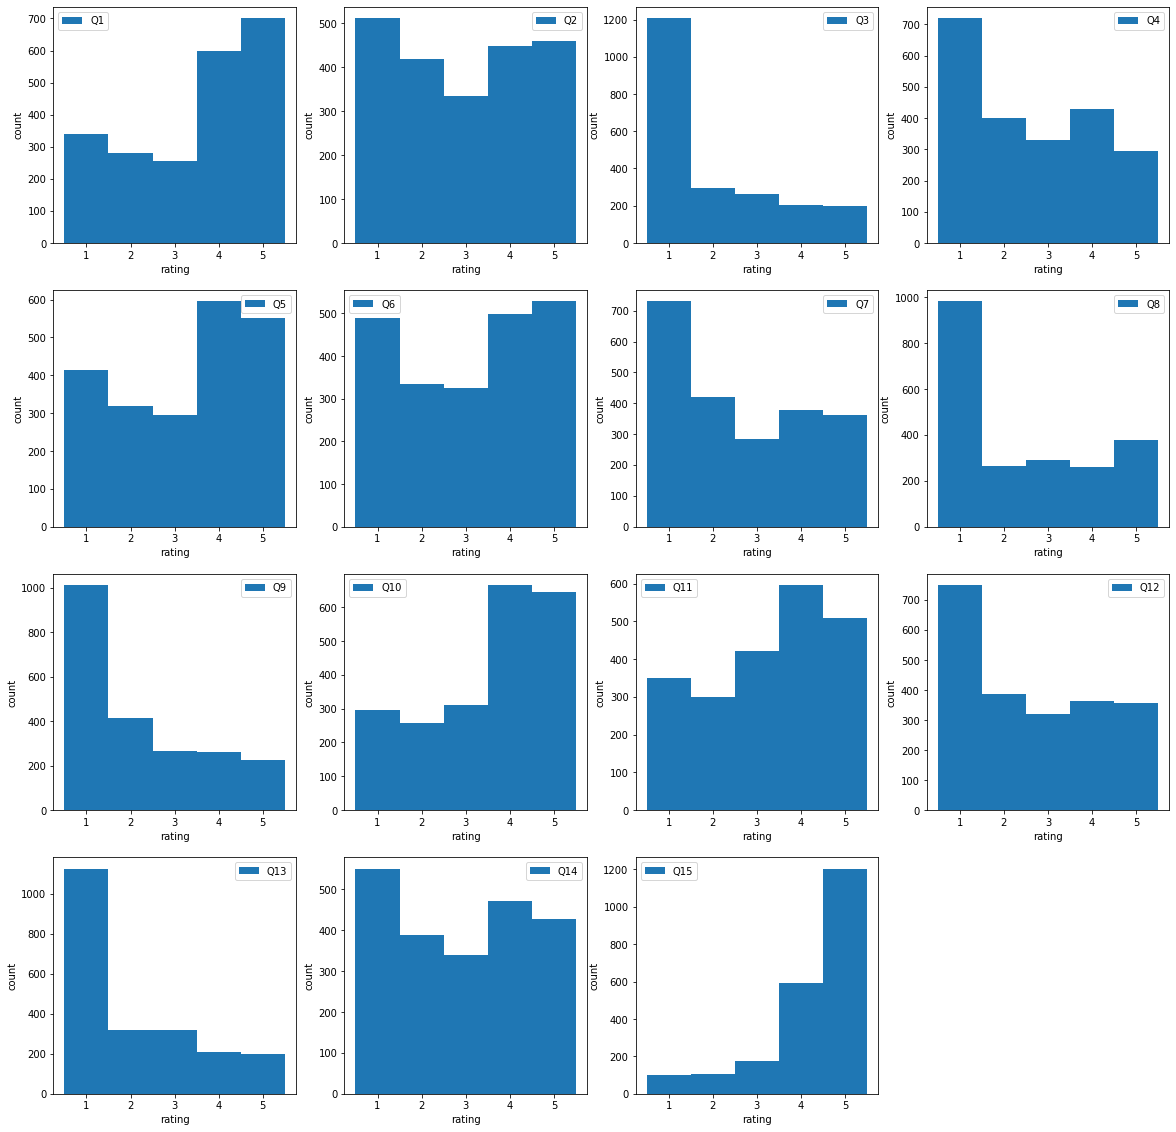

In [22]:
def make_hist_q1_q15():
  fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20,20))
  low = min(df_new_2['Q1'])
  high = max(df_new_2['Q1'])
  bins = [i-0.5 for i in range(low, high+2)]

  counter = 0
  for i in range(4):
    for j in range(4):
    
      ax = axes[i][j]
    
      if counter < 15:

        ax.hist(df_new_2.iloc[:,counter], bins=bins, label='{}'.format(df_new_2.columns[counter]))
        ax.set_xlabel('rating')
        ax.set_ylabel('count')
        leg = ax.legend()

      # Remove axis when we no longer have data
      else:
        ax.set_axis_off()

      counter = counter + 1

  plt.show()

make_hist_q1_q15()


Some are left-skewed, others are right-skewed, and still others are bimodal with two modes on the two extremes. Let's aggregate the 15 columns by taking the arithmetic mean of the reponses for each person, and then look at the distribution of the means.

In [23]:
def get_mean_scores():
  mean = df_new_2.iloc[:,0:15].mean(axis=1)
  df_new_2['mean_score'] = mean
  
  print(df_new_2.head(20))
  
  return df_new_2

df_new_2 = get_mean_scores()

    Q1  Q2  Q3  Q4  Q5  ...  race  voted  married  familysize  mean_score
0    5   5   5   5   5  ...     4      2        1           1    4.333333
1    5   4   1   2   4  ...     4      1        1           3    3.666667
2    5   4   1   4   4  ...     4      2        2           2    3.933333
3    1   1   1   1   1  ...     4      1        2           2    1.000000
4    4   3   3   3   4  ...     4      2        1           2    3.066667
5    5   4   3   3   4  ...     4      2        1           3    4.400000
6    1   1   1   1   1  ...     4      2        1           2    1.000000
7    1   2   1   1   1  ...     4      1        2           3    1.800000
8    4   4   4   5   5  ...     5      1        1           2    3.733333
9    5   5   1   5   5  ...     4      2        3           3    3.800000
10   5   4   2   4   5  ...     4      2        1           3    3.800000
11   5   4   4   5   4  ...     4      2        2           3    4.666667
12   5   4   5   5   5  ...     5     

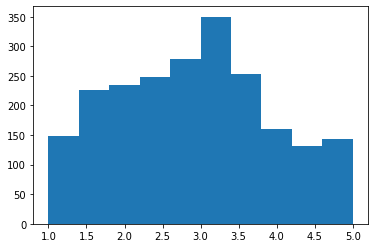

In [24]:
def make_hist_mean_scores():
  fig,axes = plt.subplots()
  axes.hist(df_new_2['mean_score'])
  plt.show()

make_hist_mean_scores()

The distribution of the mean scores for each person is unimodal and looks normal. Let's take a look at the distributions of TIPI1-TIPI10 (the Personality measure).


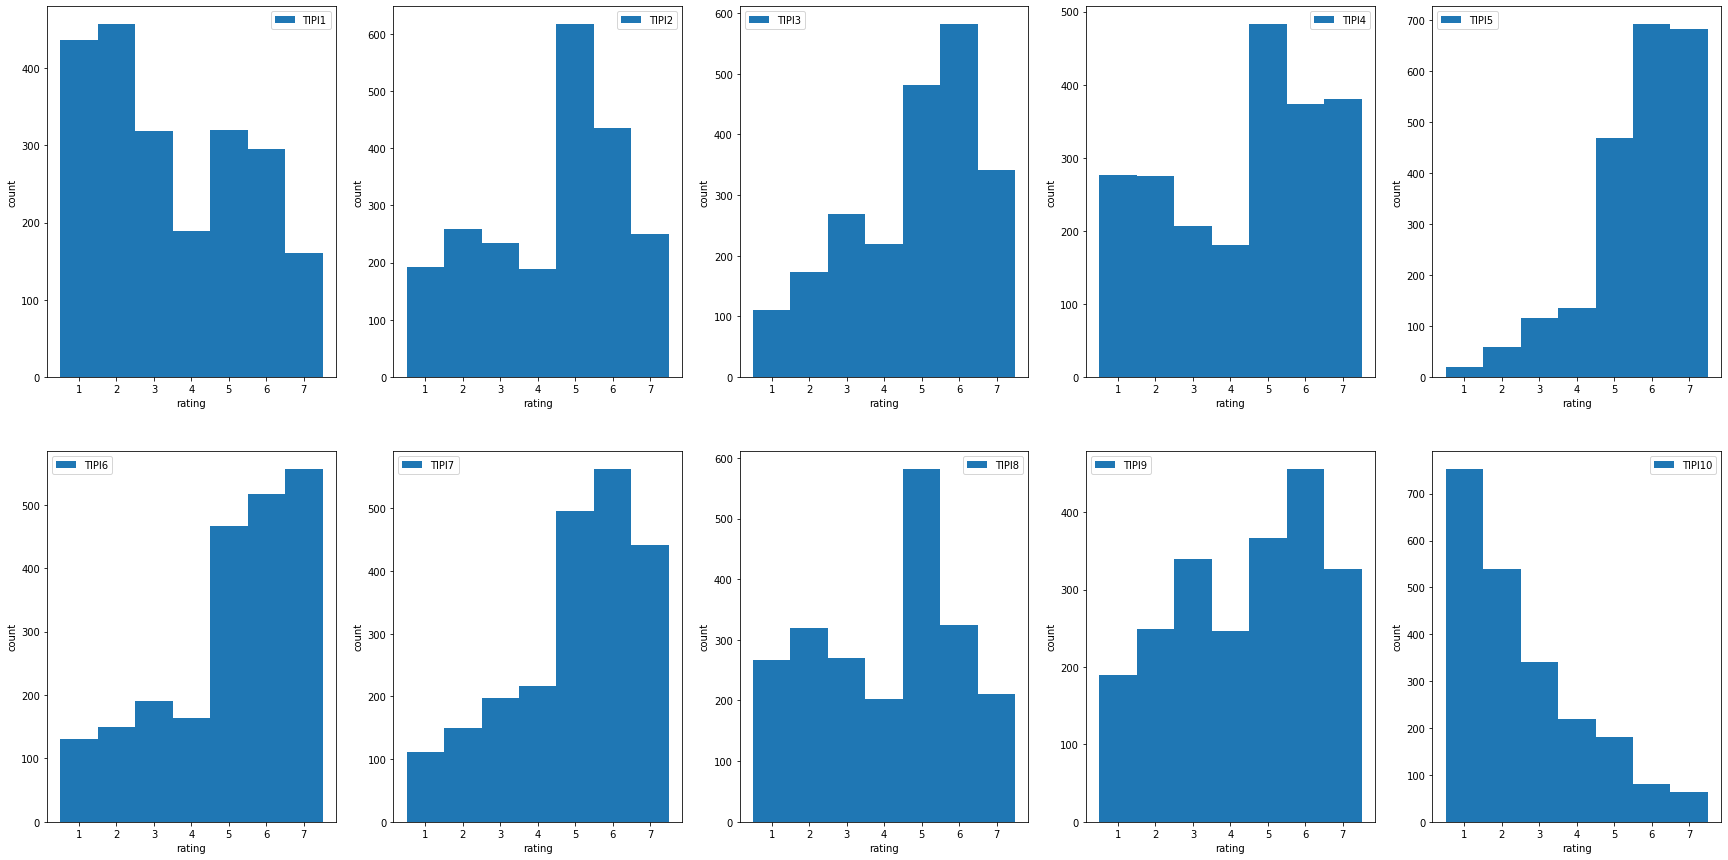

In [25]:
def make_hist_tipi1_tipi10():
  fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(30,15))
  low = min(df_new_2['TIPI1'])
  high = max(df_new_2['TIPI1'])
  bins = [i-0.5 for i in range(low, high+2)]

  counter = 0
  for i in range(2):
    for j in range(5):
    
      ax = axes[i][j]
    
      if counter < 10:

        ax.hist(df_new_2.iloc[:,15+counter], bins=bins, label='{}'.format(df_new_2.columns[15+counter]))
        ax.set_xlabel('rating')
        ax.set_ylabel('count')
        leg = ax.legend()

      # Remove axis when we no longer have data
      else:
        ax.set_axis_off()

      counter = counter + 1

  plt.show()

make_hist_tipi1_tipi10()

Pronounced left-skewed distribution for "open to new experience" and right-skewed distribution for "conventional, uncreative". Let's further investigate the relationship between the mean score of Q1-Q15 (GCBS) and each TIPI question (personality trait).


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

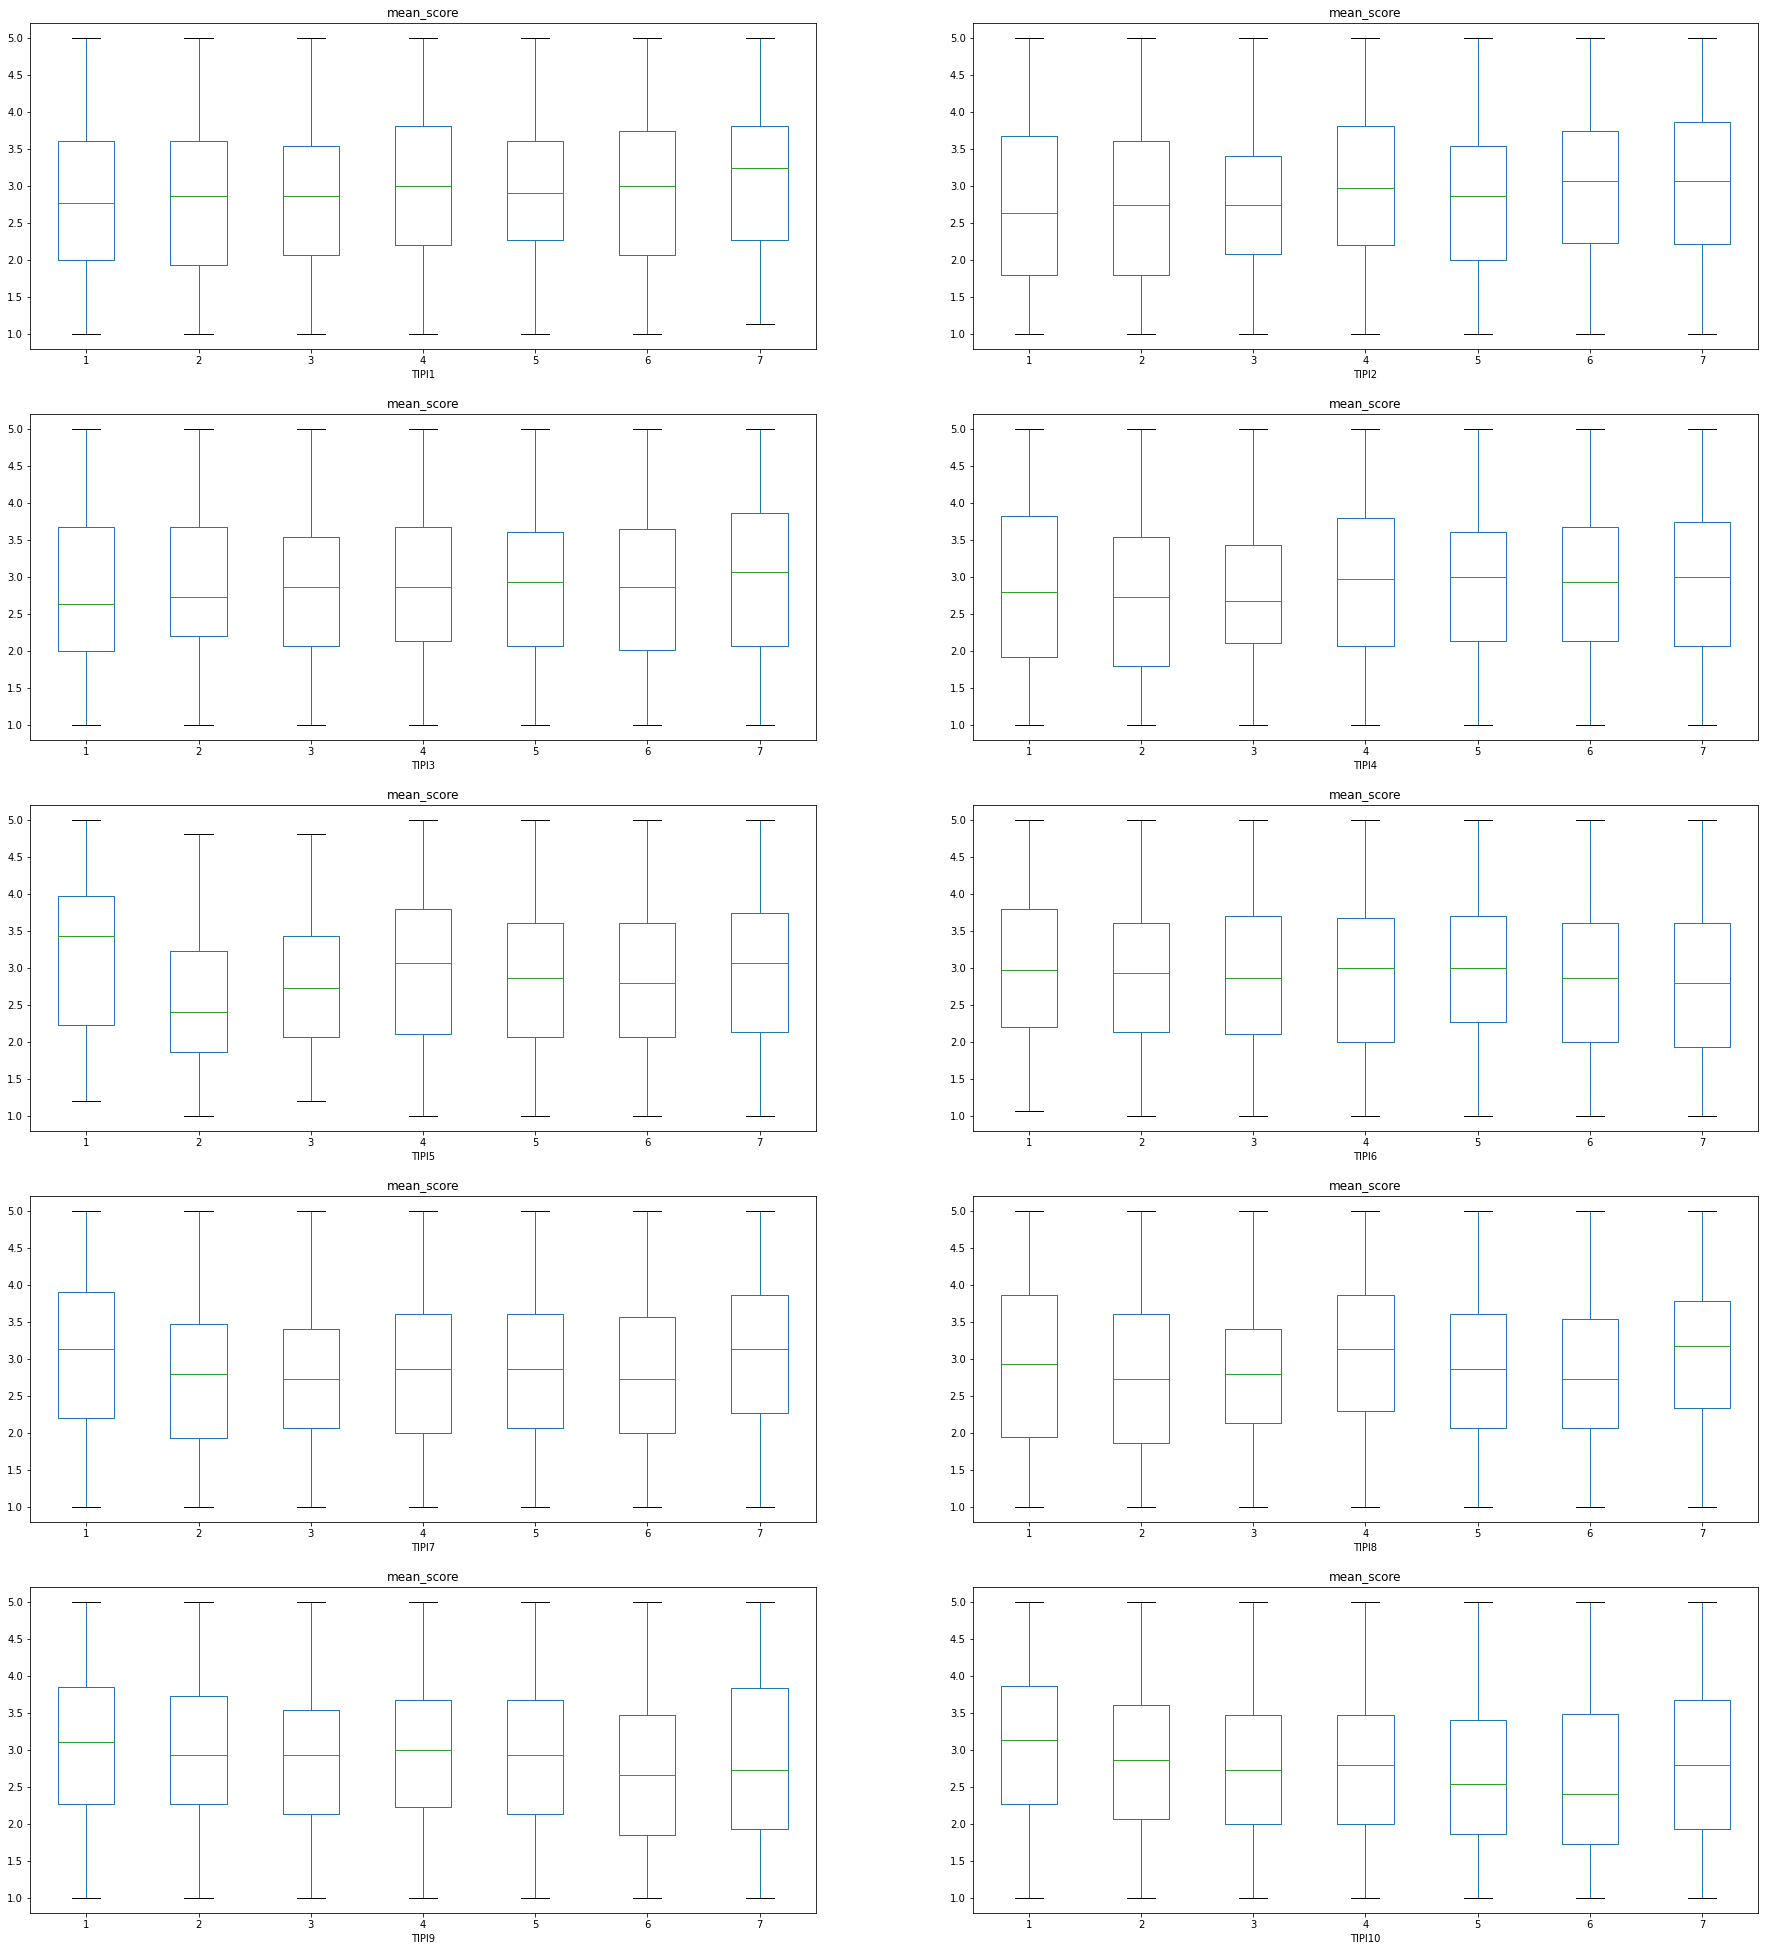

In [26]:
def make_boxplots_meanscore_tipi():
  fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(30,35))

  counter = 0
  for i in range(5):
    for j in range(2):
    
      ax = axes[i][j]
    
      if counter < 10:

        df_new_2.boxplot(column=['mean_score'], by='TIPI{}'.format(counter+1), ax=ax, grid=False)
        plt.suptitle('')

      # Remove axis when we no longer have data
      else:
        ax.set_axis_off()

      counter = counter + 1

  plt.show()

make_boxplots_meanscore_tipi()

It is hard to find any linear trend in the relationship between each TIPI item and the mean GCBS score.

Let's take a look at the distributions of the demographic variables. 

In [27]:
def plot_bars(col_name):
  counts = df_new_2[col_name].value_counts()
  counts.plot(kind='bar')

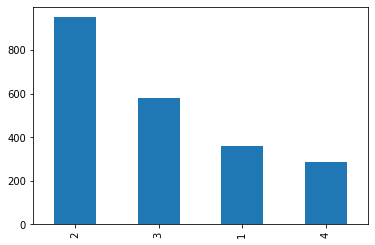

In [28]:
plot_bars('education')

Most people have high school and university degrees.

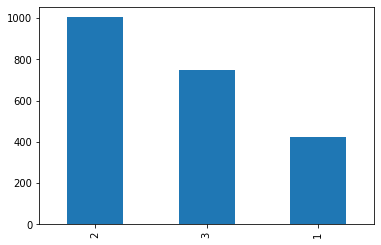

In [29]:
plot_bars('urban')

Most people lived in urban and suburban areas in childhood.

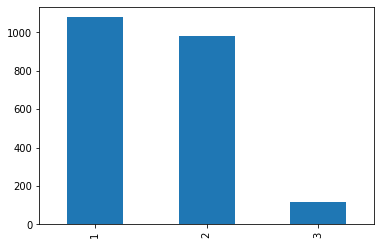

In [30]:
plot_bars('gender')

Slightly more male than female respondents.

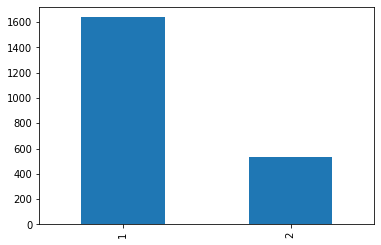

In [31]:
plot_bars('engnat')

Most people are English native speakers.

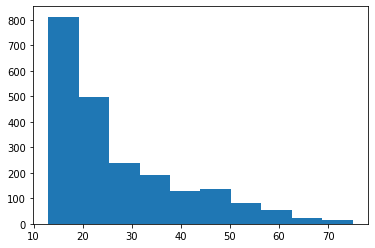

In [32]:
def make_hist_age():
  fig,axes = plt.subplots()
  axes.hist(df_new_2['age'])
  plt.show()

make_hist_age()

Right-skewed age distribution. Many people are under 30.

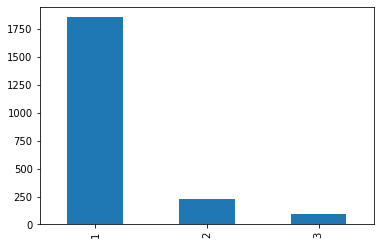

In [33]:
plot_bars('hand')

Most are right-handed.

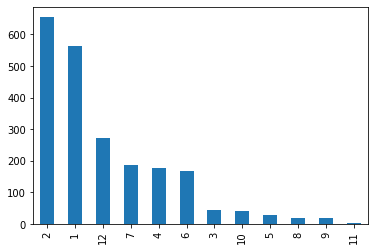

In [34]:
plot_bars('religion')

Most are agnostic and atheist.

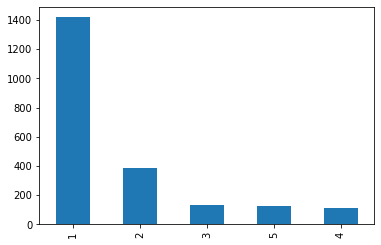

In [35]:
plot_bars('orientation')

Most are heterosexual.

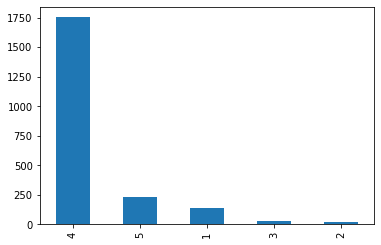

In [36]:
plot_bars('race')

Most are indigenous Australian, Native American or White.

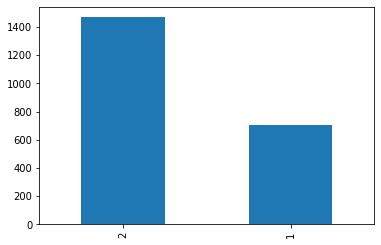

In [37]:
plot_bars('voted')

About 1 time more people did not vote than those who did in the past year.

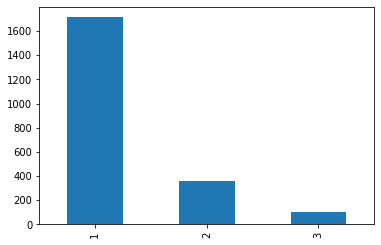

In [38]:
plot_bars('married')

Most never married (might be due to the fact that many respondents are teens and young adults).

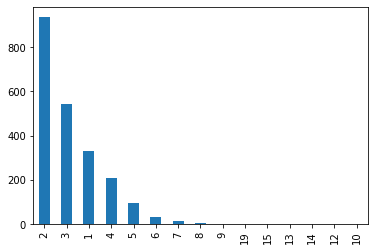

In [39]:
plot_bars('familysize')

Most have 1-2 siblings. 

Let's further look at the relationship between each demographic variable and the mean GCBS score.

In [40]:
def boxplot(var):
  fig, ax = plt.subplots(figsize=(12,10))
  df_new_2.boxplot(column=['mean_score'], by=var, ax=ax, grid=True)
  plt.suptitle('')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


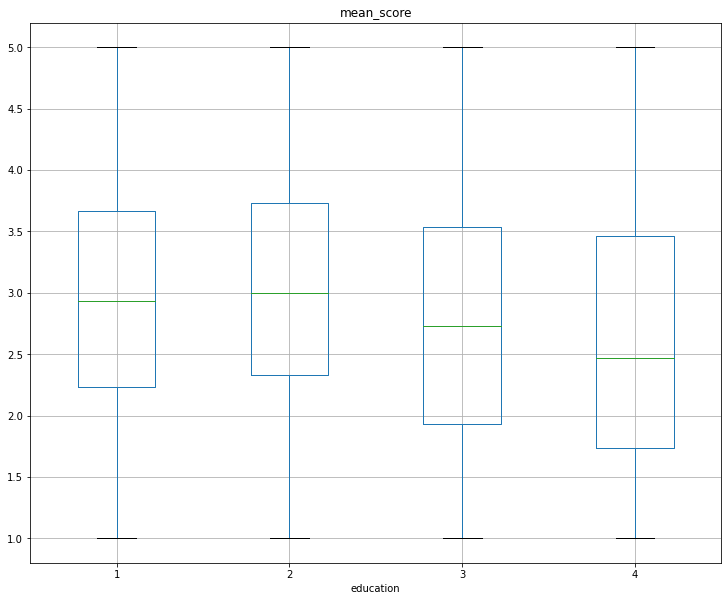

In [41]:
boxplot('education')

It looks like a linear trend - as education level increases, the mean score decreases.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


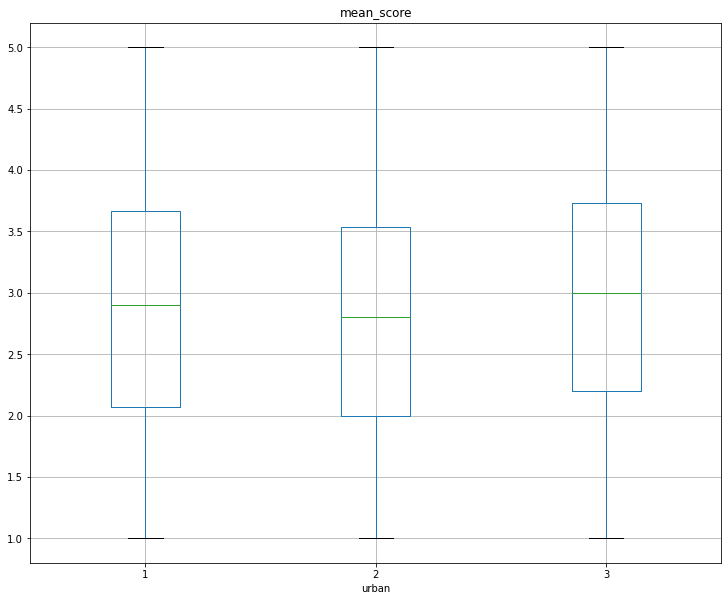

In [42]:
boxplot('urban')

Those who lived in suburban areas in childhood have slightly lower mean scores.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


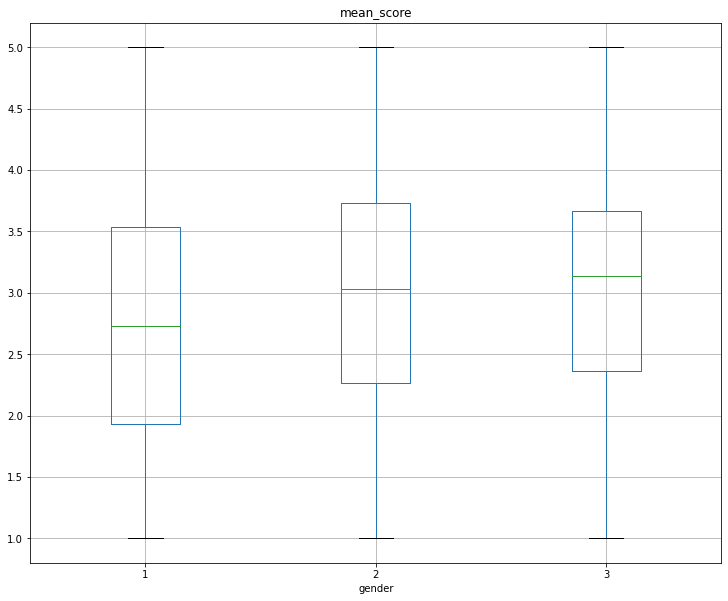

In [43]:
boxplot('gender')

Male respondents have lower mean scores than females and other genders.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


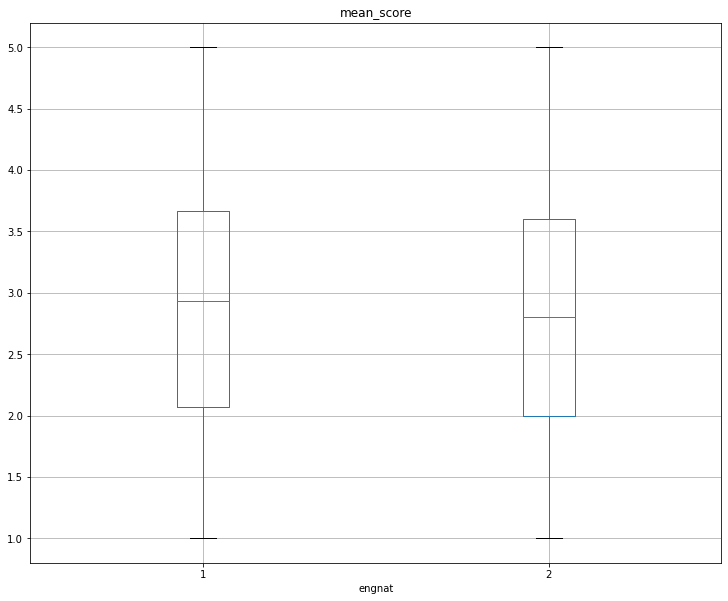

In [44]:
boxplot('engnat')

Not much difference between native and nonnative English speakers.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


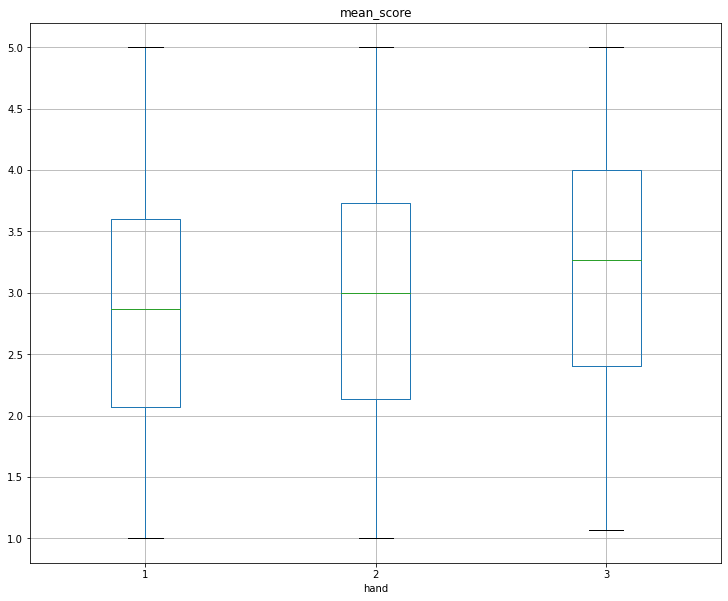

In [45]:
boxplot('hand')

Both-hand writers tend to score higher than others.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


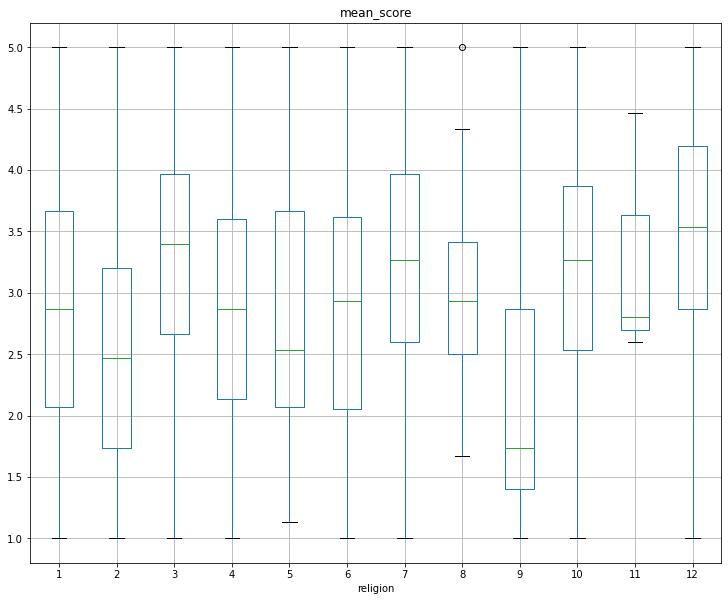

In [46]:
boxplot('religion')

On average, Buddihsts, Christians(other types), Muslims, and other religion believers score higher while Jewish people score prominently lower than all other groups.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


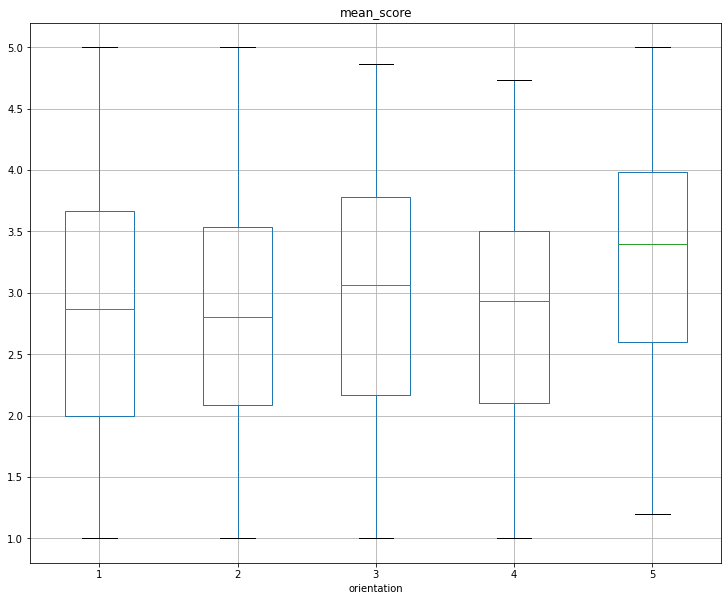

In [47]:
boxplot('orientation')

Homosexuals and other orientations score higher on average than other groups.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


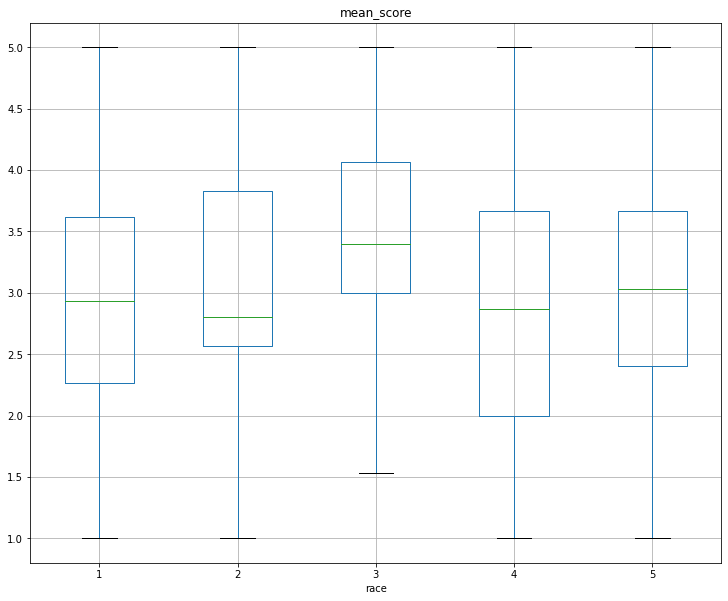

In [48]:
boxplot('race')

Black tends to score higher than other races.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


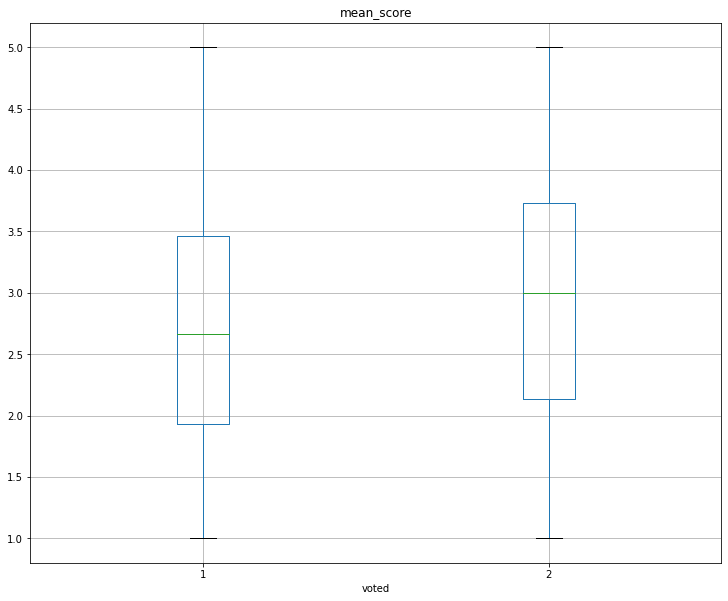

In [49]:
boxplot('voted')

Voted people tend to score lower than people who did not in the past year.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


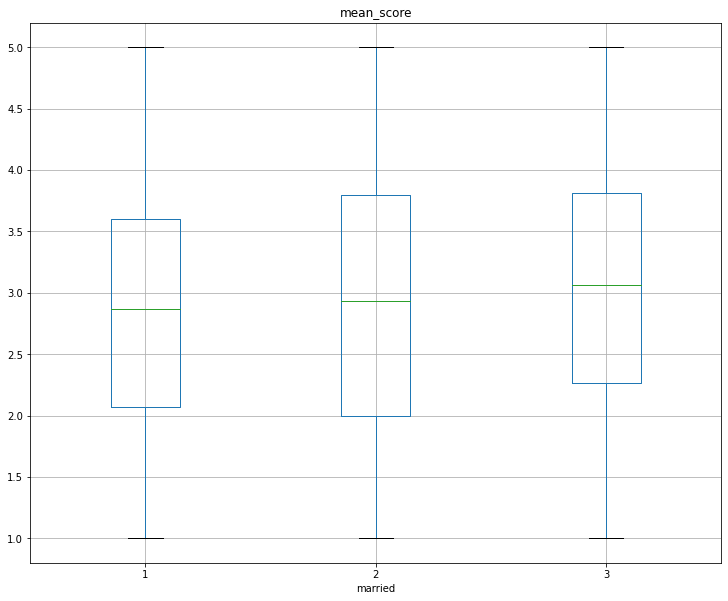

In [50]:
boxplot('married')

Not much difference for different marital statuses.

Since "age" and "familysize" are continuous variables, we cannot directly make boxplots on them like categorical variables. Instead, let's split them into multiple groups and make boxplots on the groups.

In [51]:
# first, split age into multiple bins
def bin_age(df):
  bins = [df['age'].min(), 18, 21, 35, 55, 100] 
  labels = ['youth', 'young adult', 'adult', 'middle', 'senior'] 
  age_bins = pd.cut(df['age'], bins=bins, labels=labels, right=True) 
  df['age_cat'] = age_bins
  print(df.head(10))
  return df

df_new_2 = bin_age(df_new_2)

   Q1  Q2  Q3  Q4  Q5  ...  voted  married  familysize  mean_score      age_cat
0   5   5   5   5   5  ...      2        1           1    4.333333        youth
1   5   4   1   2   4  ...      1        1           3    3.666667        adult
2   5   4   1   4   4  ...      2        2           2    3.933333       middle
3   1   1   1   1   1  ...      1        2           2    1.000000        adult
4   4   3   3   3   4  ...      2        1           2    3.066667        youth
5   5   4   3   3   4  ...      2        1           3    4.400000        adult
6   1   1   1   1   1  ...      2        1           2    1.000000        youth
7   1   2   1   1   1  ...      1        2           3    1.800000        adult
8   4   4   4   5   5  ...      1        1           2    3.733333  young adult
9   5   5   1   5   5  ...      2        3           3    3.800000       middle

[10 rows x 39 columns]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


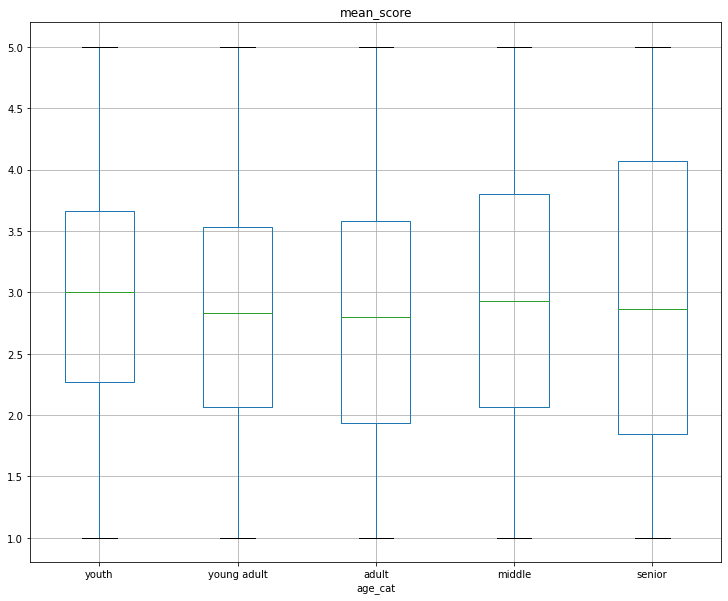

In [52]:
# then, make boxplots on age bins
boxplot('age_cat')

Older people (middle-aged and senior) tend to score higher than younger ones, but seniors also span a wider range of scores than other groups.

In [53]:
# split familysize into multiple bins
def bin_famsize(df):
  bins = [0, 1, 2, 3, df['familysize'].max()]
  labels = ['1', '2', '3', '>3']
  bins = pd.cut(df['familysize'], bins=bins, labels=labels, right=True)
  df['familysize_cat'] = bins
  print(df.head(10))
  return df

df_new_2 = bin_famsize(df_new_2)


   Q1  Q2  Q3  Q4  ...  familysize  mean_score      age_cat  familysize_cat
0   5   5   5   5  ...           1    4.333333        youth               1
1   5   4   1   2  ...           3    3.666667        adult               3
2   5   4   1   4  ...           2    3.933333       middle               2
3   1   1   1   1  ...           2    1.000000        adult               2
4   4   3   3   3  ...           2    3.066667        youth               2
5   5   4   3   3  ...           3    4.400000        adult               3
6   1   1   1   1  ...           2    1.000000        youth               2
7   1   2   1   1  ...           3    1.800000        adult               3
8   4   4   4   5  ...           2    3.733333  young adult               2
9   5   5   1   5  ...           3    3.800000       middle               3

[10 rows x 40 columns]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


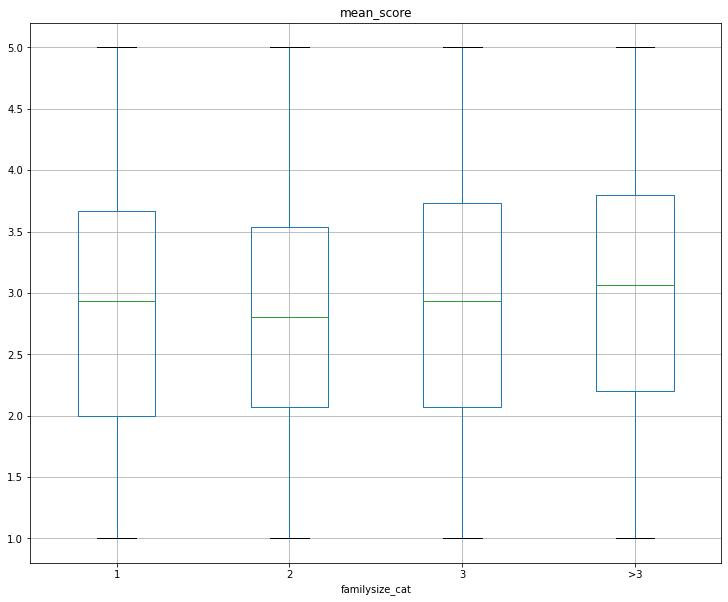

In [54]:
# then, make a boxplot based on binned family size
boxplot('familysize_cat')

Not much difference for different family sizes.

# Data Analysis

First, we use the TIPI items as explanatory variables to predict the mean GCBS score. We start with the parametric model - the multiple linear regression model.

Let's split the data into training and testing datasets (with ratio of proportions 4:1).

In [55]:
def tipi_train_test_split():
  X_TIPI = df_new_2.iloc[:,15:25]
  Y = df_new_2['mean_score']

  X_TIPI_train, X_TIPI_test, Y_train, Y_test = model_selection.train_test_split(X_TIPI, Y, test_size = .20, random_state = 42)

  return X_TIPI_train, Y_train, X_TIPI_test, Y_test

Then, fit a linear regression model on the training dataset. 

In [56]:
def fit_lr(x,y):
  mod = linear_model.LinearRegression().fit(x,y)

  slopes = mod.coef_
  intercept = mod.intercept_

  print("slopes: ", slopes, "intercept: ", intercept)

  return mod

In [57]:
x = tipi_train_test_split()[0]
y = tipi_train_test_split()[1]
print(x)
print(y)
mod1 = fit_lr(x, y)

      TIPI1  TIPI2  TIPI3  TIPI4  TIPI5  TIPI6  TIPI7  TIPI8  TIPI9  TIPI10
256       3      5      6      3      5      5      5      3      6       3
2134      1      2      7      5      7      7      7      6      4       1
556       1      4      5      2      4      6      4      1      5       3
1163      2      3      5      6      6      7      7      5      2       1
2017      1      5      6      5      7      7      1      2      2       2
...     ...    ...    ...    ...    ...    ...    ...    ...    ...     ...
1638      1      6      6      2      7      7      7      1      2       1
1095      7      4      7      7      7      1      7      7      1       7
1130      7      5      7      1      7      3      6      5      5       1
1294      6      6      6      6      7      5      5      5      4       3
860       2      5      5      5      4      5      5      2      4       5

[1740 rows x 10 columns]
256     2.133333
2134    2.066667
556     4.600000
1163    4.0

Let's evaluate the performance of the model using r^2.

On the training dataset:

In [58]:
mod1.score(x, y)

0.03861191261287278

R^2 is very low.

On the testing dataset:

In [59]:
mod1.score(tipi_train_test_split()[2],tipi_train_test_split()[3])

0.003434269128374634

R^2 is almost 0, meaning the model always predicts the expected value of y regardless of the input features. Model performance is poor, which is expected based on the preliminary exploratory analyses of the relationship between the mean GCBS score and each TIPI item. 

It is hard to find any linear trend in the relationship between each TIPI item and the mean GCBS score. The mean GCBS score may be affected by interactions among the TIPI items, however. Therefore, let's use a decision tree model to explore more complex relationships between personality and conspiracy beliefs. Since there are numerous options for the hyperparameters of a tree, let's tune the maximum depth of a tree using cross validation.  

In [60]:
def tune_max_depth(x, y):
  depth = []
  for i in range(2,30):
    mod = tree.DecisionTreeRegressor(max_depth=i, random_state=42)
    # perform 5-fold cross validation
    scores = model_selection.cross_val_score(estimator=mod, X = x, y = y, cv=5, n_jobs=-1)
    depth.append((i, scores.mean()))
  print(depth)

In [61]:
tune_max_depth(x, y)

[(2, 0.007067930771719122), (3, 0.00685043794393887), (4, -0.011050021979913893), (5, -0.04023884383967609), (6, -0.12361443673883658), (7, -0.19400771121779928), (8, -0.3242662069388624), (9, -0.45230051643219743), (10, -0.5675419593312089), (11, -0.6918221725486073), (12, -0.737077823633294), (13, -0.780763985650907), (14, -0.8179458224607007), (15, -0.8646726871237908), (16, -0.8447608944795414), (17, -0.8970626937137258), (18, -0.8931439460462304), (19, -0.9112667153713085), (20, -0.9294603271667748), (21, -0.9414028576378252), (22, -0.9296202275813583), (23, -0.9187522939450282), (24, -0.927104283573172), (25, -0.9253392075756748), (26, -0.9253392075756748), (27, -0.9253392075756748), (28, -0.9253392075756748), (29, -0.9253392075756748)]


A decision tree performs quite poorly (r^2 is very low) regardless of the depth level of the tree. We may conclude that the brief measure of the Big Five Personality alone cannot make a good prediction of conspiracy beliefs overall.


Let's investigate the effects of demographic information on predicting conspiracy beliefs, also using multiple linear regression and decision trees.

Since we are going to build a regression model on the data, we need to transform the nominal variables into dummy variables for effective interpretations of the estimated coefficients.

In [62]:
def dummy_encode(col_name):
  dummy = pd.get_dummies(df_new_2[col_name], prefix=col_name)
  return dummy

In [63]:
urban_d = dummy_encode('urban')
gender_d = dummy_encode('gender')
engnat_d = dummy_encode('engnat')
hand_d = dummy_encode('hand')
religion_d = dummy_encode('religion')
orientation_d = dummy_encode('orientation')
race_d = dummy_encode('race')
voted_d = dummy_encode('voted')
married_d = dummy_encode('married')

In [64]:
def df_with_dummy(df):
  df_new = pd.concat([df,urban_d,gender_d,engnat_d,hand_d,religion_d,
            orientation_d,race_d,voted_d,married_d], axis=1)
  df_new.drop(columns=['urban','gender','engnat','hand','religion','orientation','race','voted','married'],inplace=True)
  
  print(df_new.head())

  return df_new

df_new_3 = df_with_dummy(df_new_2)

df_new_3

   Q1  Q2  Q3  Q4  Q5  ...  voted_1  voted_2  married_1  married_2  married_3
0   5   5   5   5   5  ...        0        1          1          0          0
1   5   4   1   2   4  ...        1        0          1          0          0
2   5   4   1   4   4  ...        0        1          0          1          0
3   1   1   1   1   1  ...        1        0          0          1          0
4   4   3   3   3   4  ...        0        1          1          0          0

[5 rows x 69 columns]


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,age,familysize,mean_score,age_cat,familysize_cat,urban_1,urban_2,urban_3,gender_1,gender_2,gender_3,engnat_1,engnat_2,hand_1,hand_2,hand_3,religion_1,religion_2,religion_3,religion_4,religion_5,religion_6,religion_7,religion_8,religion_9,religion_10,religion_11,religion_12,orientation_1,orientation_2,orientation_3,orientation_4,orientation_5,race_1,race_2,race_3,race_4,race_5,voted_1,voted_2,married_1,married_2,married_3
0,5,5,5,5,5,3,5,5,1,4,4,5,4,4,5,6,7,6,7,6,3,7,5,1,1,1,14,1,4.333333,youth,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0
1,5,4,1,2,4,5,4,1,4,5,5,5,1,4,5,6,7,7,5,7,6,5,1,5,1,3,25,3,3.666667,adult,3,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0
2,5,4,1,4,4,5,4,3,1,5,5,5,3,5,5,1,3,7,2,6,4,5,5,5,3,2,37,2,3.933333,middle,2,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,4,2,6,2,6,5,6,3,6,2,3,34,2,1.000000,adult,2,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0
4,4,3,3,3,4,3,3,4,2,3,3,2,2,3,4,2,5,4,2,5,6,2,3,5,5,2,17,2,3.066667,youth,2,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2170,5,5,1,1,5,5,3,5,1,1,5,3,1,5,5,7,1,6,1,7,1,6,3,6,2,2,42,2,3.400000,middle,2,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0
2171,5,2,2,2,4,4,2,2,1,4,5,4,2,2,5,3,5,5,3,7,5,5,5,3,1,3,32,3,3.066667,adult,3,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0
2172,1,1,1,1,1,3,1,1,1,1,2,1,1,1,3,5,5,6,7,6,3,5,2,3,2,4,25,2,1.333333,adult,2,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0
2173,2,1,4,1,1,1,1,3,1,2,1,1,1,1,4,1,6,7,1,7,7,3,3,7,2,2,19,2,1.666667,young adult,2,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0


Let's split the data into training and testing datasets (with ratio of proportions 4:1).

In [65]:
def deminfo_train_test_split():
  X_deminfo = pd.concat([df_new_3[['education','age','familysize']], df_new_3.loc[:,'urban_1':'married_3']], axis=1)
  Y = df_new_3['mean_score']

  X_deminfo_train, X_deminfo_test, Y_train, Y_test = model_selection.train_test_split(X_deminfo, Y, test_size = .20, random_state = 42)

  return X_deminfo_train, Y_train, X_deminfo_test, Y_test


Then, fit a linear regression model on the training dataset.

In [66]:
x = deminfo_train_test_split()[0]
y = deminfo_train_test_split()[1]
print(x)
print(y)
mod2 = fit_lr(x, y)

      education  age  familysize  ...  married_1  married_2  married_3
256           2   43           2  ...          0          1          0
2134          2   19           4  ...          1          0          0
556           3   48           2  ...          0          1          0
1163          2   17           3  ...          1          0          0
2017          2   17           3  ...          1          0          0
...         ...  ...         ...  ...        ...        ...        ...
1638          2   37           2  ...          1          0          0
1095          2   23           3  ...          1          0          0
1130          3   21           5  ...          1          0          0
1294          1   21           5  ...          1          0          0
860           4   40           2  ...          1          0          0

[1740 rows x 41 columns]
256     2.133333
2134    2.066667
556     4.600000
1163    4.066667
2017    3.666667
          ...   
1638    5.000000
109

Let's evaluate the performance of the model using r^2.

On the training dataset:

In [67]:
mod2.score(x, y)

0.14998350876134126

On the testing dataset:

In [68]:
mod2.score(deminfo_train_test_split()[2], deminfo_train_test_split()[3])

0.06360715163647257

R^2 is better than that of the model using TIPI items as independent variables. Note that in psychology, it is very common to have r^2 lower than 0.5. 

Let's make a table for the independent variables and their associated coefficients estimated from the regression.

In [69]:
feature_names = mod2.feature_names_in_

coefs = pd.DataFrame(
    mod2.coef_,
    index = feature_names,
    columns=['Coefficient']
)
coefs

,Coefficient
education,-0.113127
age,0.005015
familysize,0.064193
urban_1,0.021389
urban_2,-0.094131
urban_3,0.072742
gender_1,-0.083230
gender_2,0.067107
gender_3,0.016123
engnat_1,0.020564


Based on the table, variables that bear a high **positive effect** on the mean GCBS score include **Buddist, Christian(other), other religions, other sexual orientations**, and **Black**. Variables that are strongly **negatively correlated** with the mean score are **education level, atheist, Jewish, asexual**, and **Indigenous Australian, Native American or White**.

Note that the higher the mean GCBS score, the stronger the general belief in conspiracy theories. 

Let's try fitting a decision tree to the data. As before, we can tune the maximum depth of a tree using cross validation.

In [70]:
X_deminfo = pd.concat([df_new_3[['education','age','familysize']], df_new_3.loc[:,'urban_1':'married_3']], axis=1)
Y = df_new_3['mean_score']
print(X_deminfo)
print(Y)
tune_max_depth(X_deminfo, Y)

      education  age  familysize  ...  married_1  married_2  married_3
0             1   14           1  ...          1          0          0
1             3   25           3  ...          1          0          0
2             2   37           2  ...          0          1          0
3             3   34           2  ...          0          1          0
4             2   17           2  ...          1          0          0
...         ...  ...         ...  ...        ...        ...        ...
2170          2   42           2  ...          0          1          0
2171          3   32           3  ...          1          0          0
2172          4   25           2  ...          1          0          0
2173          2   19           2  ...          1          0          0
2174          1   16           1  ...          1          0          0

[2175 rows x 41 columns]
0       4.333333
1       3.666667
2       3.933333
3       1.000000
4       3.066667
          ...   
2170    3.400000
217

Looks like with max_depth=2 or 4, the decision tree obtains the best performance (with highest mean r^2).

Let's build a decision tree with max_depth=4 on the training dataset.

In [71]:
def fit_tree(x, y):
  mod = tree.DecisionTreeRegressor(max_depth=4, random_state=42).fit(x, y)
  return mod

In [72]:
mod3 = fit_tree(deminfo_train_test_split()[0], deminfo_train_test_split()[1])

Check r^2.
On the training dataset:

In [73]:
mod3.score(deminfo_train_test_split()[0], deminfo_train_test_split()[1])

0.1282836546715974

On the testing dataset:

In [74]:
mod3.score(deminfo_train_test_split()[2], deminfo_train_test_split()[3])

0.07155147113869798

In [75]:
mod2.score(deminfo_train_test_split()[2], deminfo_train_test_split()[3])

0.06360715163647257

R^2 for the testing data is higher than that of the linear regression model. 

Let's plot the tree.

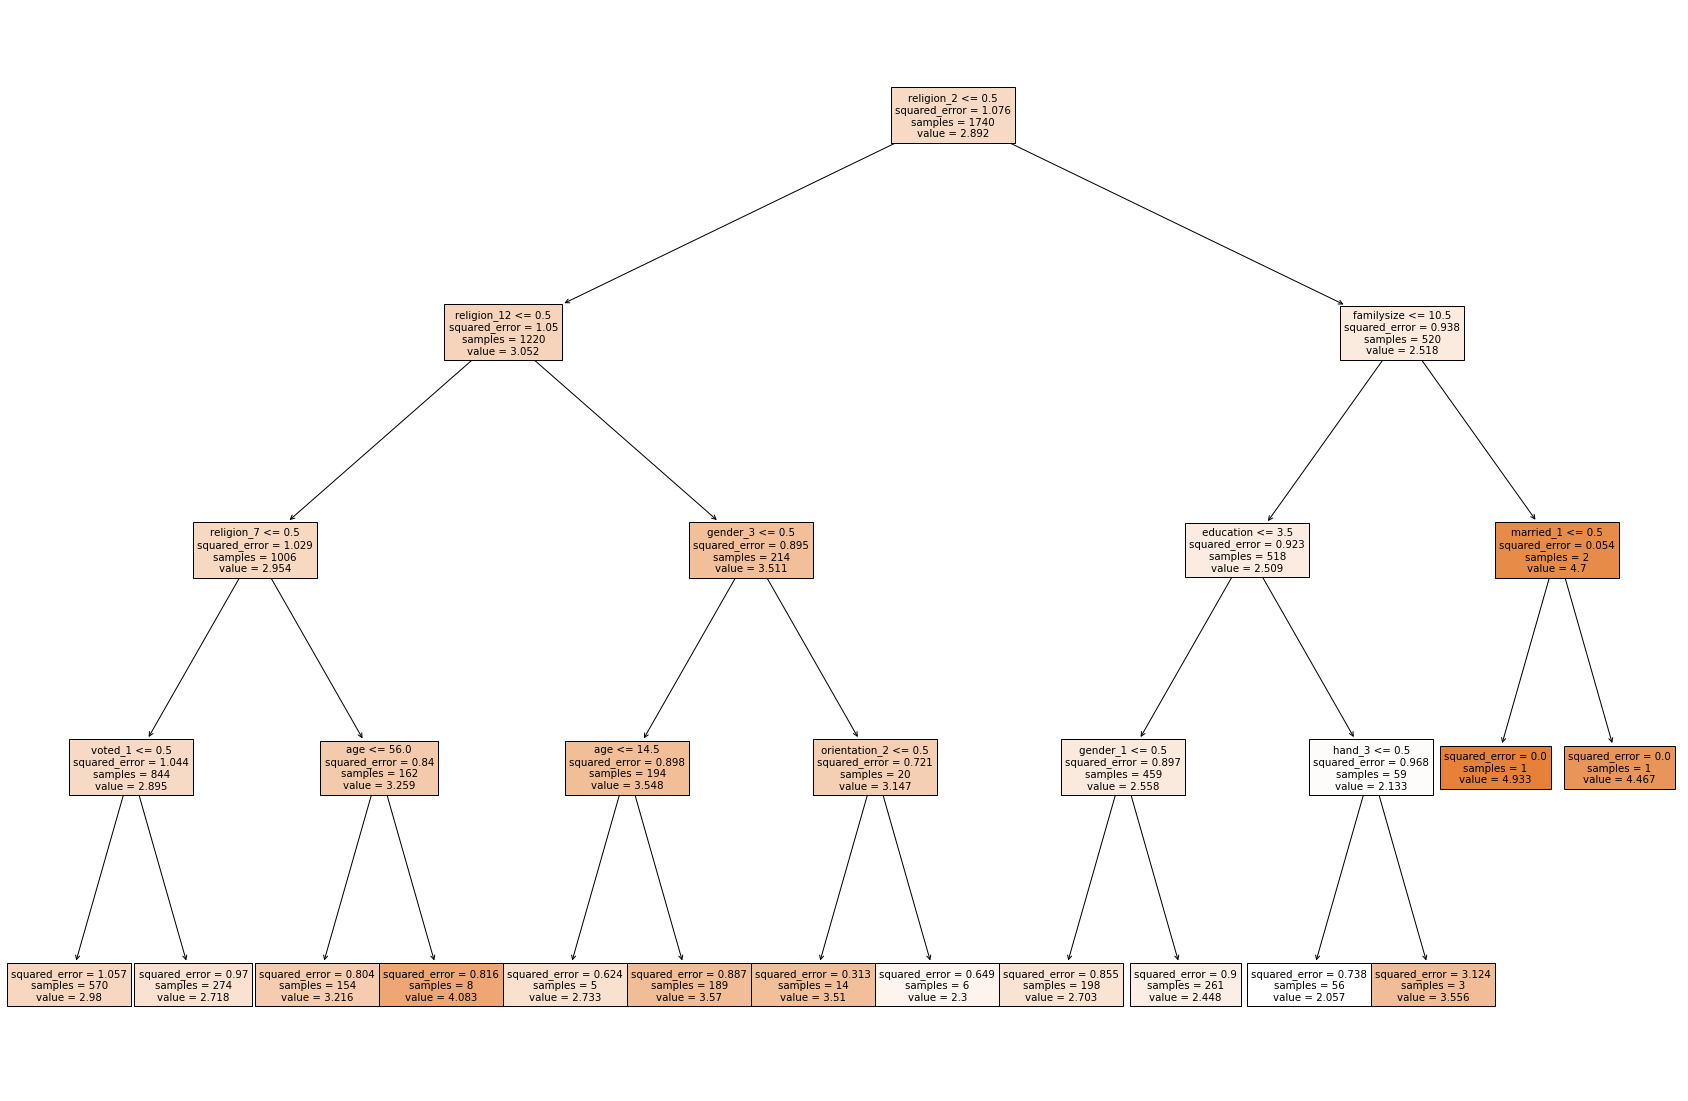

In [76]:
plt.figure(figsize=(30,20))
tree.plot_tree(mod3, feature_names=mod3.feature_names_in_, filled=True)
plt.show()

This tree captures abundant information from respondents' demographic information and their mean GCBS scores. For instance, the first split differentiates atheists (with a mean GCBS = 2.518) from other religionists (with a mean GCBS = 3.052), indicating that whether one has religion plays a crucial role in explaining their conspiracy belief tendency. Among respondents with religion, those belonging to a major religious group also have significantly lower mean score (2.954) than those who identify themselves as other religion believers (3.511). Besides, Christians in non-major denominations tend to score higher (with a mean score of 3.259) than other major religious groups (with a mean score of 2.895).

Another key factor is education level. Whether one has a graduate degree makes influence on their general belief in conspiracy theories - those with a graduate degree has a mean GCBS score of 2.133 while those without has a mean score of 2.588. The tree is also capable of identifying idiosyncratic features, such as one's hand of writing and gender identification, in affecting their conspiracy beliefs. 

# Conclusion

In conclusion, my analysis of this dataset does not support the hypothesis that conspiracy beliefs and personality traits are correlated. Instead, it is other individual characteristics, most notably one's religious belief and education level, that predict their conspiracy beliefs. Nevertheless, as the literature suggests, there are relationships between cognitive styles and conspiracy beliefs, and massive studies have shown associations of one's religious belief with their cognitive styles (Yilmaz,2021; Baron,2020; Pennycook et al.,2012; Shenhav et al.,2012; Zuckerman et al.,2020). Therefore, a potential extension for future surveys on conspiracy beliefs is to include items measuring cognitive styles, which may provide strong predictive power for conspiracy belief tendency. 







---
# Submission Guidelines (keep this section here)
---


When you are ready to submit your project, part of the submission process will be to register your notebook for reviewing.  

For each milestone, you will submit an updated version of your project notebook (this notebook) with that milestone’s requirements. Your project notebook ID and URL should be the same.

You will also receive the links and instructions to do the peer reviews.

**Submission for Milestone0:**
1. Save a copy of this notebook in your Google drive
3. Share the Noetbook and place the Notebook ID in the first code cell
4. Download as "DMAP_FA21_Final_Project_MS0.ipynb"
5. Submit this in Moodle
